# Naive Bayes and Text Mining:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
import re
import string
import nltk

# Data Exploration and Preprocessing

In [4]:
data=pd.read_csv('blogs.csv')

In [6]:
data

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [23]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Priyanka\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Priyanka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [29]:
def clean(x):
    x=x.lower()
    x=re.sub('[\.*?/]','',x)
    x=re.sub('[%s]' %re.escape(string.punctuation),'',x)
    x=re.sub('w*\d\w*','',x)
    x=re.sub('[0-9]','',x)
    x=re.sub('[''""..,]','',x)
    return x
cleaned_data=lambda x:clean(x)

In [31]:
data['Data']=data.Data.apply(cleaned_data)
data

,Data,Labels
0,path cantaloupesrvcscmuedumagnesiumclubcccmued...,alt.atheism
1,newsgroups altatheism\npath cantaloupesrvcscmu...,alt.atheism
2,path cantaloupesrvcscmuedudasnewsharvardedunoc...,alt.atheism
3,path cantaloupesrvcscmuedumagnesiumclubcccmued...,alt.atheism
4,xref cantaloupesrvcscmuedu altatheism talkreli...,alt.atheism
...,...,...
1995,xref cantaloupesrvcscmuedu talkabortion altath...,talk.religion.misc
1996,xref cantaloupesrvcscmuedu talkreligionmisc ta...,talk.religion.misc
1997,xref cantaloupesrvcscmuedu talkorigins talkrel...,talk.religion.misc
1998,xref cantaloupesrvcscmuedu talkreligionmisc al...,talk.religion.misc


In [41]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')  
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
data['Data']=data['Data'].apply(word_tokenize)
data

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Priyanka\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Priyanka\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Priyanka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Data,Labels
0,"[path, cantaloupesrvcscmuedumagnesiumclubcccmu...",alt.atheism
1,"[newsgroups, altatheism, path, cantaloupesrvcs...",alt.atheism
2,"[path, cantaloupesrvcscmuedudasnewsharvardedun...",alt.atheism
3,"[path, cantaloupesrvcscmuedumagnesiumclubcccmu...",alt.atheism
4,"[xref, cantaloupesrvcscmuedu, altatheism, talk...",alt.atheism
...,...,...
1995,"[xref, cantaloupesrvcscmuedu, talkabortion, al...",talk.religion.misc
1996,"[xref, cantaloupesrvcscmuedu, talkreligionmisc...",talk.religion.misc
1997,"[xref, cantaloupesrvcscmuedu, talkorigins, tal...",talk.religion.misc
1998,"[xref, cantaloupesrvcscmuedu, talkreligionmisc...",talk.religion.misc


In [43]:
stopword=set(stopwords.words('english'))
data['Data']=data['Data'].apply(lambda tokens:[word for word in tokens if word not in stopword])
data

,Data,Labels
0,"[path, cantaloupesrvcscmuedumagnesiumclubcccmu...",alt.atheism
1,"[newsgroups, altatheism, path, cantaloupesrvcs...",alt.atheism
2,"[path, cantaloupesrvcscmuedudasnewsharvardedun...",alt.atheism
3,"[path, cantaloupesrvcscmuedumagnesiumclubcccmu...",alt.atheism
4,"[xref, cantaloupesrvcscmuedu, altatheism, talk...",alt.atheism
...,...,...
1995,"[xref, cantaloupesrvcscmuedu, talkabortion, al...",talk.religion.misc
1996,"[xref, cantaloupesrvcscmuedu, talkreligionmisc...",talk.religion.misc
1997,"[xref, cantaloupesrvcscmuedu, talkorigins, tal...",talk.religion.misc
1998,"[xref, cantaloupesrvcscmuedu, talkreligionmisc...",talk.religion.misc


In [45]:
data['Data']=[" ".join(doc) for  doc in data['Data']]
tf=TfidfVectorizer()
tfmatrix=tf.fit_transform(data['Data'])

print('TF_TDF MATRIX:','\n',tfmatrix.toarray())
print('COLUMNS NAMES:','\n',tf.get_feature_names_out())

TF_TDF MATRIX: 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
COLUMNS NAMES: 
 ['aa' 'aaa' 'aaaaarrrrgh' ... 'zyv' 'zyxel' 'zz']


In [47]:
extracted_data=pd.DataFrame(tfmatrix.toarray(),columns=tf.get_feature_names_out())
extracted_data

,aa,aaa,aaaaarrrrgh,aaboston,aafkhthmj,aalternate,aaltonen,aam,aan,aangegeven,...,zwspbh,zx,zxmkr,zy,zyda,zydacsnpsnavymil,zyehcaspianuscedu,zyv,zyxel,zz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Naive Bayes Model for Text Classification & Evaluation

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
features=tf.fit_transform(data['Data'])
target=data['Labels']

In [52]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=43)

In [54]:
from sklearn.naive_bayes import MultinomialNB

In [56]:
model=MultinomialNB()

In [58]:
model.fit(x_train,y_train)

MultinomialNB()

In [60]:
y_pred=model.predict(x_test)

In [62]:
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.8325


In [64]:
print("Classification Report",classification_report(y_test,y_pred))

Classification Report                           precision    recall  f1-score   support

             alt.atheism       0.68      0.81      0.74        16
           comp.graphics       0.78      0.74      0.76        19
 comp.os.ms-windows.misc       0.55      1.00      0.71        12
comp.sys.ibm.pc.hardware       0.86      0.95      0.90        20
   comp.sys.mac.hardware       0.72      0.81      0.76        16
          comp.windows.x       0.89      0.94      0.91        17
            misc.forsale       0.81      0.94      0.87        18
               rec.autos       0.89      0.94      0.91        17
         rec.motorcycles       1.00      0.91      0.95        23
      rec.sport.baseball       1.00      0.71      0.83        28
        rec.sport.hockey       0.50      1.00      0.67        10
               sci.crypt       0.72      0.95      0.82        19
         sci.electronics       1.00      0.59      0.74        29
                 sci.med       1.00      0.69      0.

# Sentiment Analysis

In [67]:
pip install -U textblob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 4.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [69]:
from textblob import TextBlob
def get_sentiment(text):
    analysis=TextBlob(text)
    if analysis.sentiment.polarity>0:
        return 'Positive'
    elif analysis.sentiment.polarity<0:
        return 'Negitive'
    else:
        return 'Neutral'
    
data['Sentiment']=data['Data'].apply(get_sentiment)
print(data[['Labels','Sentiment']])

                  Labels Sentiment
0            alt.atheism  Positive
1            alt.atheism  Negitive
2            alt.atheism  Positive
3            alt.atheism  Positive
4            alt.atheism  Positive
...                  ...       ...
1995  talk.religion.misc  Positive
1996  talk.religion.misc  Positive
1997  talk.religion.misc  Positive
1998  talk.religion.misc  Positive
1999  talk.religion.misc  Positive

[2000 rows x 2 columns]


In [71]:
sentiment_distribution=data.groupby('Labels')['Sentiment'].value_counts()
print(sentiment_distribution)

Labels                    Sentiment
alt.atheism               Positive     65
                          Negitive     35
comp.graphics             Positive     72
                          Negitive     28
comp.os.ms-windows.misc   Positive     77
                          Negitive     23
comp.sys.ibm.pc.hardware  Positive     81
                          Negitive     19
comp.sys.mac.hardware     Positive     74
                          Negitive     26
comp.windows.x            Positive     78
                          Negitive     20
                          Neutral       2
misc.forsale              Positive     79
                          Negitive     21
rec.autos                 Positive     77
                          Negitive     23
rec.motorcycles           Positive     72
                          Negitive     28
rec.sport.baseball        Positive     65
                          Negitive     35
rec.sport.hockey          Positive     60
                          Negitive     4

# Word Cloud

In [76]:
pip install wordcloud


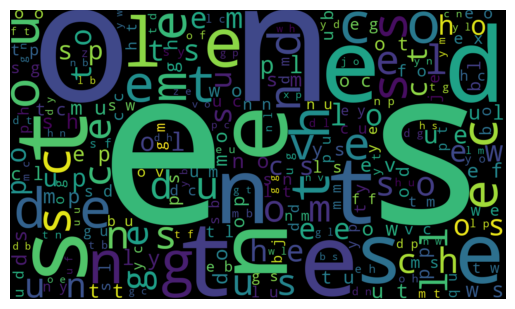

In [78]:
from wordcloud import WordCloud
data['Data']=[" ".join(doc) for doc in data["Data"]]

wordcloud=WordCloud(width=1200,height=700).generate(" ".join(data['Data']))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()